In [17]:
import os
import json

# Create an empty list to store the dictionaries
json_data_list = []

# Directory where your JSON files are located
json_files_directory = '../../DataEng/datalake/bronze'

# Loop through each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.startswith('data_') and filename.endswith('.json'):
        # Construct the full path to the JSON file
        file_path = os.path.join(json_files_directory, filename)

        # Open and read the JSON file
        with open(file_path, 'r') as json_file:
            # Load the JSON data into a dictionary
            json_data = json.load(json_file)

            # Create a new dictionary to hold both the file name and JSON data
            json_with_filename = {
                'filename': filename,  # Save the file name
                'data': json_data     # Save the JSON data
            }

            # Append the dictionary to the list
            json_data_list.append(json_with_filename)

# Now, json_data_list contains a list of dictionaries, where each dictionary has a 'filename' key
# with the name of the JSON file and a 'data' key with the JSON data from that file for files starting with 'data_'.


import pandas as pd


# Create a DataFrame
df = pd.DataFrame(json_data_list)

# If you want to flatten the 'data' dictionary into separate columns:
df = pd.concat([df.drop(['data'], axis=1), df['data'].apply(pd.Series)], axis=1)

# Now, df contains your data in a Pandas DataFrame format
df

# Extract and transform the 'filename' column into a timestamp column
df['timestamp'] = pd.to_datetime(df['filename'].str.extract(r'data_(\d{14})\.json')[0], format='%Y%m%d%H%M%S')

# Drop the 'filename' column if no longer needed
df = df.drop('filename', axis=1)

# Now, df contains a 'timestamp' column extracted from the 'filename'
df.head()

#save df to csv on the silver layer name ghanor
df.drop(columns=['targetAmount', 'targetDate']).to_csv('../../DataEng/datalake/silver/ghanor.csv', index=False)

In [18]:
#read ghanor file on ../../DataEng/datalake/silver/ghanor.csv
import pandas as pd

df = pd.read_csv('../../DataEng/datalake/silver/ghanor.csv', sep=',')
df.head()

,raisedAmount,supporters,timestamp
0,5148832.0,5032,2023-10-10 08:24:03
1,4731772.0,4495,2023-10-08 21:07:04
2,4847103.0,4650,2023-10-08 22:24:04
3,5617834.0,5263,2023-10-13 18:28:04
4,5138702.0,5020,2023-10-09 23:19:04


In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#order by timestamp
df = df.sort_values(by=['timestamp'], ascending=False)
df.head(10)

,raisedAmount,supporters,timestamp
2724,5638705.0,5285,2023-10-14 13:12:04
2353,5638705.0,5285,2023-10-14 13:11:03
925,5638705.0,5285,2023-10-14 13:10:04
4416,5638705.0,5285,2023-10-14 13:09:05
4054,5638705.0,5285,2023-10-14 13:08:04
4745,5638705.0,5285,2023-10-14 13:07:04
2800,5638705.0,5285,2023-10-14 13:06:04
60,5638705.0,5285,2023-10-14 13:05:04
3323,5638705.0,5285,2023-10-14 13:04:05
2444,5638416.0,5285,2023-10-14 13:03:04


In [20]:
# analyze the data only from the last day column timestamp


#transform column timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
last_day = df['timestamp'].max().date()

last_day

#group data from last day

df_last_day = df[df['timestamp'].dt.date == last_day]
df_last_day

,raisedAmount,supporters,timestamp
2724,5638705.0,5285,2023-10-14 13:12:04
2353,5638705.0,5285,2023-10-14 13:11:03
925,5638705.0,5285,2023-10-14 13:10:04
4416,5638705.0,5285,2023-10-14 13:09:05
4054,5638705.0,5285,2023-10-14 13:08:04
...,...,...,...
2055,5632306.0,5279,2023-10-14 10:31:04
530,5632306.0,5279,2023-10-14 10:30:04
1214,5631987.0,5279,2023-10-14 10:29:03
1513,5631987.0,5279,2023-10-14 10:28:04


In [21]:
df_last_day.head(20)

,raisedAmount,supporters,timestamp
2724,5638705.0,5285,2023-10-14 13:12:04
2353,5638705.0,5285,2023-10-14 13:11:03
925,5638705.0,5285,2023-10-14 13:10:04
4416,5638705.0,5285,2023-10-14 13:09:05
4054,5638705.0,5285,2023-10-14 13:08:04
4745,5638705.0,5285,2023-10-14 13:07:04
2800,5638705.0,5285,2023-10-14 13:06:04
60,5638705.0,5285,2023-10-14 13:05:04
3323,5638705.0,5285,2023-10-14 13:04:05
2444,5638416.0,5285,2023-10-14 13:03:04


In [22]:
#create columns with diff raisedAmount and first raisedAmount
df_last_day['diff_raisedAmount'] = df_last_day['raisedAmount'] - df_last_day['raisedAmount'].iloc[-1]

#the same but for the supporters
df_last_day['diff_supporters'] = df_last_day['supporters'] - df_last_day['supporters'].iloc[-1]

/tmp/ipykernel_1896/1427054642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_day['diff_raisedAmount'] = df_last_day['raisedAmount'] - df_last_day['raisedAmount'].iloc[-1]
/tmp/ipykernel_1896/1427054642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_day['diff_supporters'] = df_last_day['supporters'] - df_last_day['supporters'].iloc[-1]


In [23]:
df_last_day['diff_raisedAmount']

2724    6718.0
2353    6718.0
925     6718.0
4416    6718.0
4054    6718.0
         ...  
2055     319.0
530      319.0
1214       0.0
1513       0.0
2504       0.0
Name: diff_raisedAmount, Length: 166, dtype: float64

<Axes: xlabel='timestamp'>

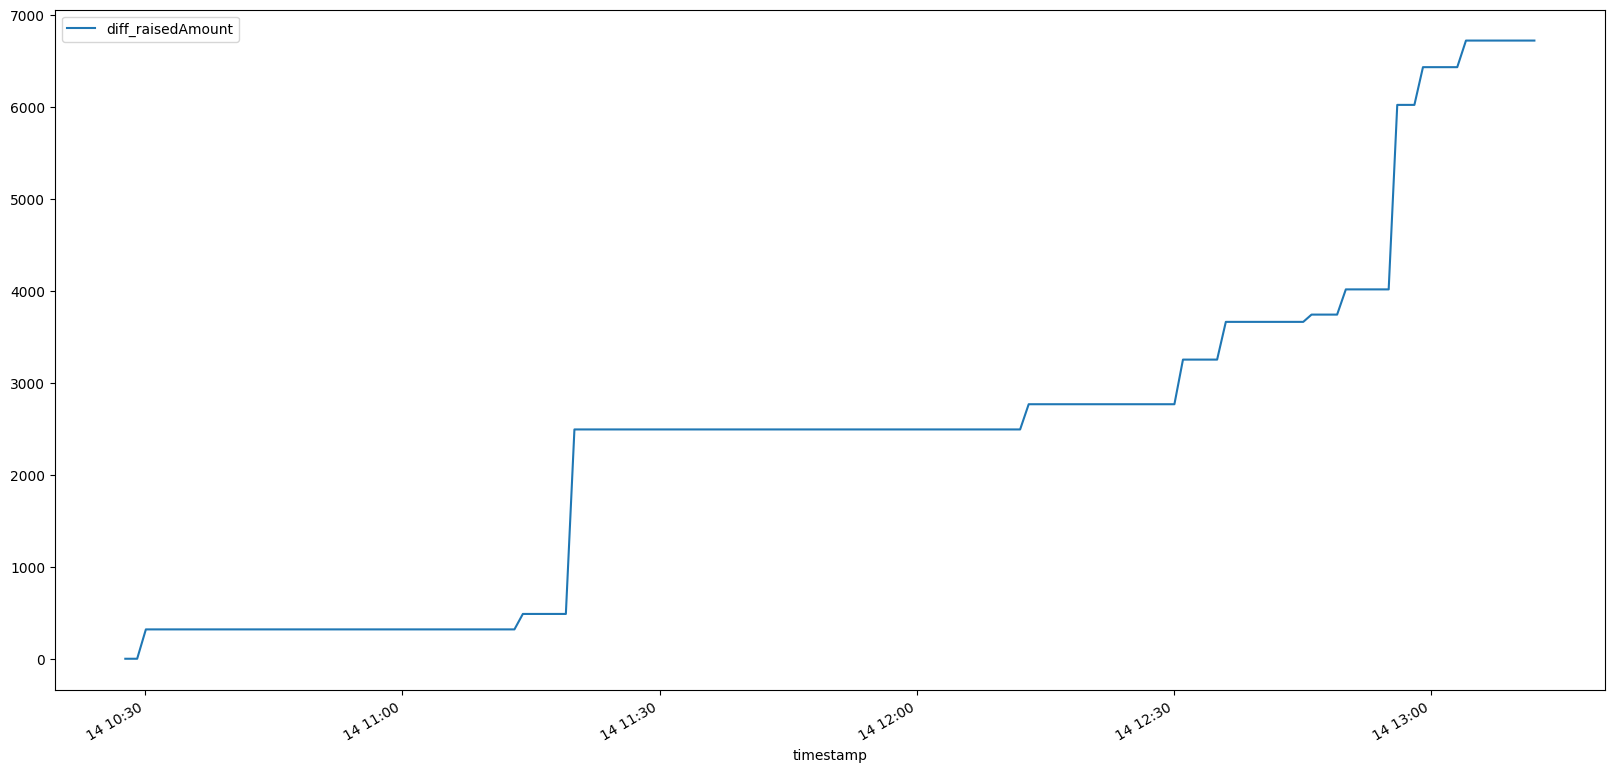

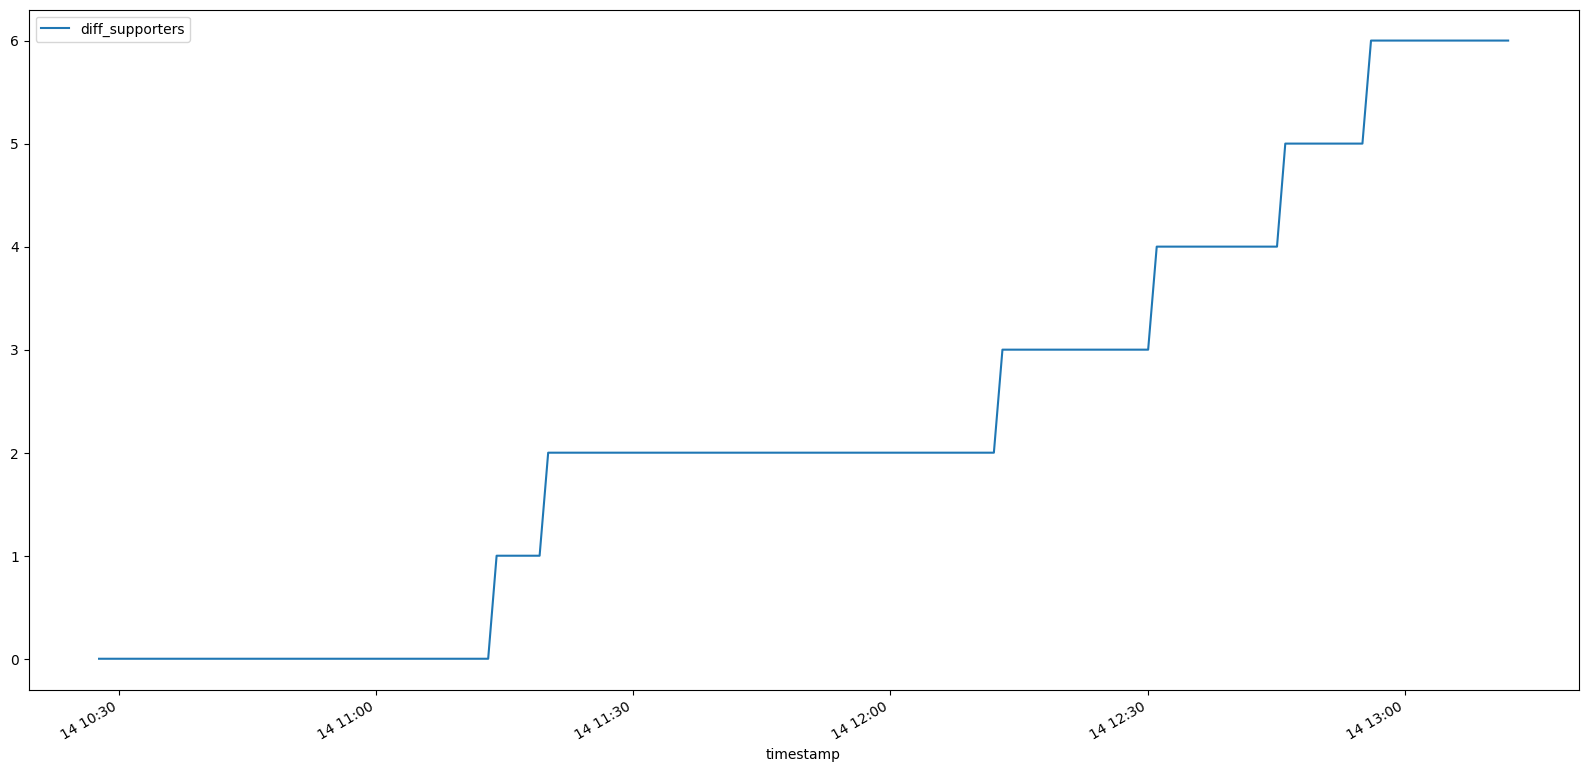

In [24]:
df_last_day.plot(x='timestamp', y='diff_raisedAmount', kind='line', figsize=(20, 10))
df_last_day.plot(x='timestamp', y='diff_supporters', kind='line', figsize=(20, 10))

In [25]:
#transform column timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [26]:
#  select data from date 10/10/2023
df_2023 = df[df['timestamp'].dt.date == pd.to_datetime('2023-10-10').date()]
df_2023

,raisedAmount,supporters,timestamp
3210,5450447.0,5105,2023-10-10 23:11:04
1393,5449962.0,5104,2023-10-10 23:10:04
1154,5449962.0,5104,2023-10-10 23:09:04
598,5449962.0,5104,2023-10-10 23:08:04
3491,5449962.0,5104,2023-10-10 23:07:03
...,...,...,...
164,5140189.0,5022,2023-10-10 00:04:03
3703,5140189.0,5022,2023-10-10 00:03:04
1168,5140189.0,5022,2023-10-10 00:02:04
4219,5140189.0,5022,2023-10-10 00:01:03


In [27]:
#create columns with diff raisedAmount and first raisedAmount
df_2023['diff_raisedAmount'] = df_2023['raisedAmount'].iloc[-1] - df_2023['raisedAmount']

#the same but for the supporters
df_2023['diff_supporters'] = df_2023['supporters'].iloc[-1] - df_2023['supporters'] 

/tmp/ipykernel_1896/2370981286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['diff_raisedAmount'] = df_2023['raisedAmount'].iloc[-1] - df_2023['raisedAmount']
/tmp/ipykernel_1896/2370981286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['diff_supporters'] = df_2023['supporters'].iloc[-1] - df_2023['supporters']


In [28]:
df_2023['raisedAmount'].iloc[0] - df_2023['raisedAmount'].iloc[0]

0.0

In [29]:
df_2023['raisedAmount'].iloc[0] - df_2023['raisedAmount'].iloc[1]

485.0

In [30]:
df_2023['supporters'].iloc[0] - df_2023['supporters'].iloc[0]

0

In [31]:
df_2023['supporters'].iloc[1] - df_2023['supporters'].iloc[0]

-1

<Axes: xlabel='timestamp'>

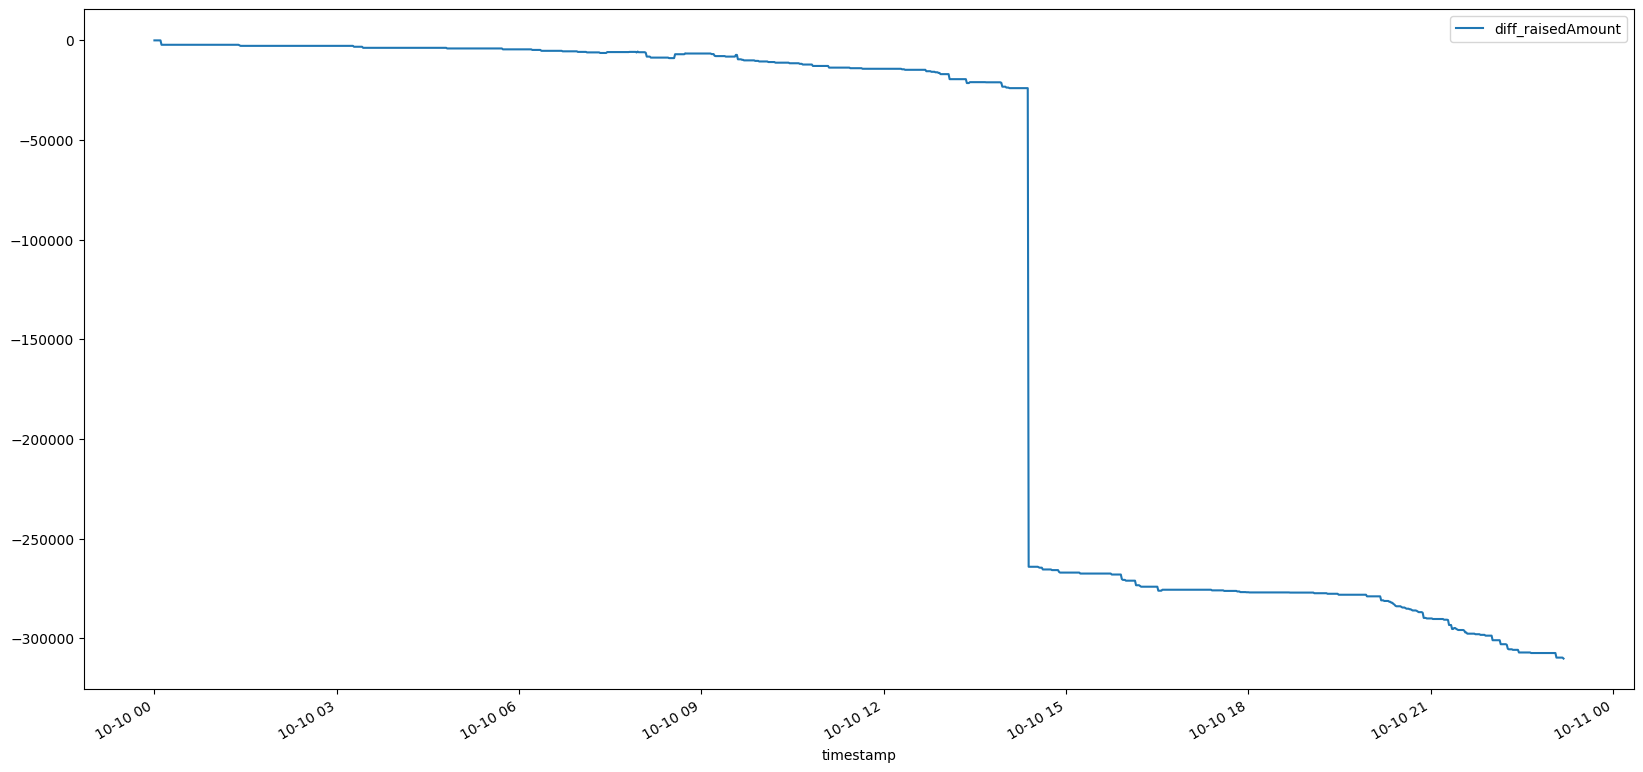

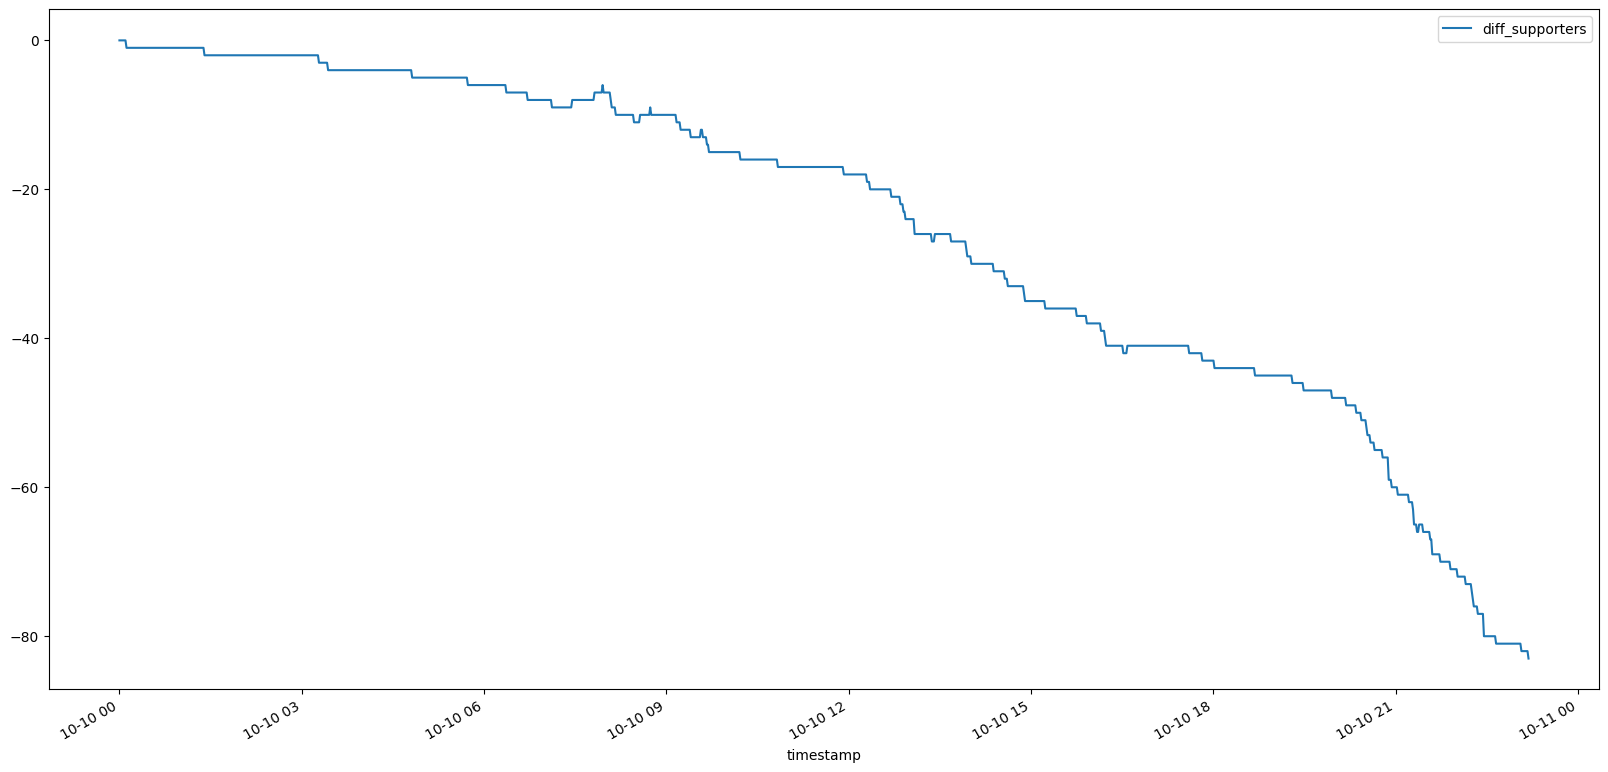

In [32]:
df_2023.plot(x='timestamp', y='diff_raisedAmount', kind='line', figsize=(20, 10))
df_2023.plot(x='timestamp', y='diff_supporters', kind='line', figsize=(20, 10))